# Eigenvalue Approximation by Ellipse Equation


Given an eigenvalue pair $\Gamma_{n} = \{a_{2n}, a_{2n+2}\}$, we approximate the coalescing of the pair at EPs as


\begin{equation}
\Gamma_{n} = \gamma_{n} \pm \frac{\Delta_{n}}{|q_{n}|}\sqrt{|q_{n}|^2 - \frac{4k^2}{\epsilon^2}}
\end{equation}


where:
* $q_{n}$ is the Exceptional point
* $\Delta_{n} = \left((2n+2)^2 - (2n)^2 \right) / 2$ is the difference between the eigenvalues evaluated at $q=0$, and
* $\gamma_{n} = a_{2n}+\Delta_{n}$ centers the ellipse between the two eigenvalues at the line $q=0$.

For example, we have for the two eigenvalue pairs $q_{0}=1.468i$, $q_{1}=16.471i$,  $\Delta_{0}=2$, $\Delta_{1}=10$ and $\gamma_{0}=2$ and $\gamma_{2}=26$.

### NOTE:
The approximation above describes a purely real eigenvalue pair before the Exceptional Point, or a purely imaginary pair of (complex conjugated) Eigenvalues for values of q past the Exceptional Point. Thus, we need to add extra terms for values beyond the EPs. 
### Solution:
We need to add a correction associated with the asymptotic limit $|q|\rightarrow\infty$. For the first two pairs of (coalesced) eigenvalues, the asymptotic relations are

\begin{align}\label{large_q_as}
\Gamma_{0} &\sim \sqrt{2|q|}-\dfrac{1}{4} \pm i\left(\sqrt{2|q|}-2|q| \right) , \\
 \Gamma_{2} &\sim 5\sqrt{2|q|}-\dfrac{13}{4} \pm i\left(5\sqrt{2|q|} - 2|q| \right) ,
\end{align}


where $|q|=2k/\epsilon$ is the absolute value of Mathieu's canonical parameter. The correction only involves the real component above.

* In general (from Zeiner et al 2012), a good leading order approximation of eigenvalue pairs is


\begin{equation}
    \Gamma_{n} \approx \left[4n +1 \right]\left[1+i \right]\sqrt{2|q|} - 2q - 2n^2 -n -1/4, \;\;\;\text{for}\;\; q{>>}q_{n}
\end{equation}



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

In [2]:
from mathieu_functions import mathieu_functions as mfs
from mathieu_functions import A_coefficients

In [3]:
# =================================
# Important parameters to define
# =================================

# Location of Exceptional Points
qn = [1.468* (1j), 16.471* (1j), 47.806* (1j) ] # Exceptional Points q_{n}
dn = [2, 26, 82]  # Delta_{n}
Gamma = [2, 10, 18]  # \Gamma_{n}


N = 70  # length of k-array
alpha = 2  # length of channel periodic in x. I have used alpha=10 before, but for the gaussian initial condition a value of 2 is better.
eps = 0.05  # ta / td << 1 for weakly diffusive processes.

K_test = np.linspace(0, N/alpha, 1000)
Q = (1j) * K_test / (8*eps)
qf = Q[-1].imag  # Largest value of Mathieu's parameter. SHOULD NOT exceed 62, for now...

M = 25  # matrix size. This value works well for values of q up to 62i.
colors = ['#0000cc', '#990000', 'darkgreen',
          'indigo', '#009999', 'orange',
          '#ff66ff', '#b266ff', '#33ff99']

In [4]:
print('last value of q-array: ')
qf

last value of q-array: 


87.5

In [5]:
A_vals = A_coefficients(Q, M, 'even', 'one')  # even function with period one-pi

## First Pair of Eigenvalues


In [6]:
a0c = dn[0] - (Gamma[0]/qn[0].imag)*np.sqrt(-(qn[0])**2 + Q**2)
a2c = dn[0] + (Gamma[0]/qn[0].imag)*np.sqrt(-(qn[0])**2 + Q**2)

## Asymptotic Correction

In [7]:
## valid at large |q| only
n=0
lll_i0 = np.where(Q>qn[n])[0][0]
Q0 = Q[lll_i0:]
a02 = (4*n + 1)* np.sqrt(2 * Q0.imag) - 2*(n**2) - n - 1 / 4

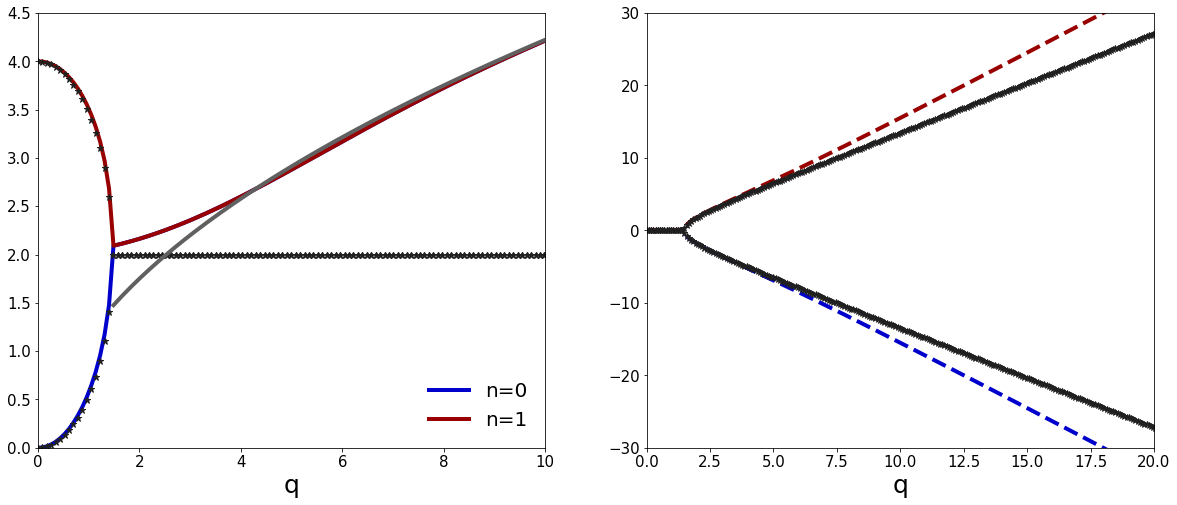

In [8]:
fig, ax = plt.subplots(figsize=(20, 8))
gs = gridspec.GridSpec(1,2)
gs.update(hspace=0.05)
ax1 = plt.subplot(gs[0])
plt.plot(Q.imag, A_vals['a0'].real, color=colors[0], lw=4, label='n=0')
plt.plot(Q.imag, a0c.real, '#202020', lw=2, ls='', marker='*', markersize=7)
plt.plot(Q.imag, A_vals['a2'].real, color=colors[1], lw=4, label='n=1')
plt.plot(Q.imag, a2c.real, '#202020', lw=2, ls='', marker='*', markersize=7)
plt.plot(Q0.imag, a02, '#606060', lw=4)
plt.xlim(0, 10)
plt.ylim(0, 4.5)
plt.yticks(size=15)
plt.xlabel('q', fontsize=25)
plt.xticks(size=15)
plt.legend(fontsize=20, frameon=False)
ax2 = plt.subplot(gs[1])
plt.plot(Q.imag, A_vals['a0'].imag, color=colors[0], lw=4, ls='--', label='n=0')
plt.plot(Q.imag, a0c.imag, '#202020', lw=2, ls='', marker='*', markersize=7)
plt.plot(Q.imag, A_vals['a2'].imag, color=colors[1], lw=4, ls='--', label='n=1')
plt.plot(Q.imag, a2c.imag, '#202020', lw=2, ls='', marker='*', markersize=7)
plt.xlim(0, 20)
plt.yticks(size=15)
plt.xlabel('q', fontsize=25)
plt.xticks(size=15)
plt.ylim(-30, 30)
plt.show()

## Second Pair of Eigenvalues

In [9]:
a4c = dn[1] - (Gamma[1]/qn[1].imag)*np.sqrt(-(qn[1])**2 + Q**2)
a6c = dn[1] + (Gamma[1]/qn[1].imag)*np.sqrt(-(qn[1])**2 + Q**2)

## Asymptotic Correction (Real part only)

In [10]:
## valid at large |q| only
n = 1
lll_i1 = np.where(Q>qn[n])[0][0]
Q1 = Q[lll_i1:]
a46 = (4*n + 1) * np.sqrt(2 * Q1.imag) -2*(n**2) - n - 1/4

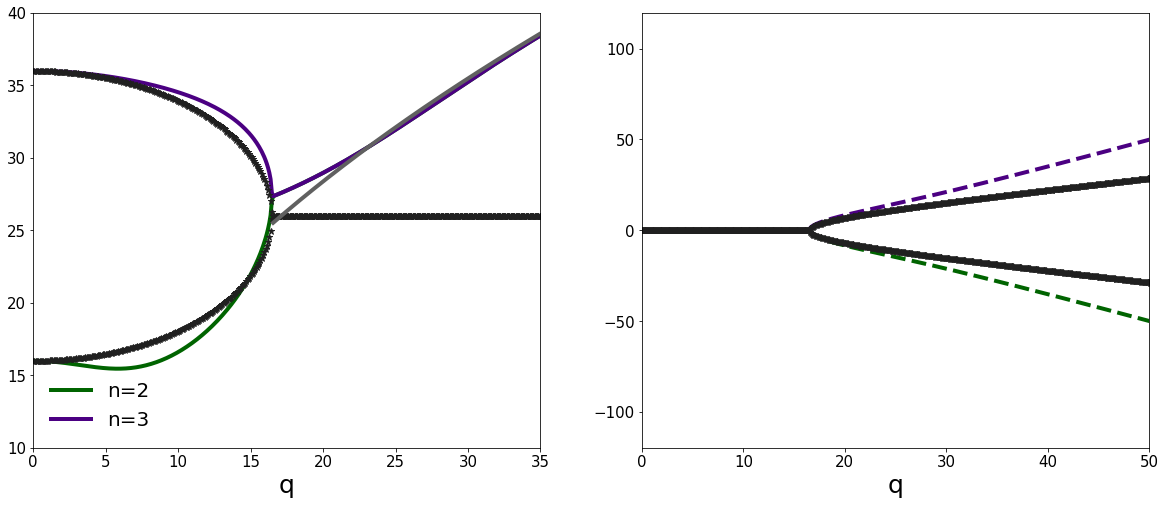

In [11]:
fig, ax = plt.subplots(figsize=(20, 8))
gs = gridspec.GridSpec(1,2)
gs.update(hspace=0.05)
ax1 = plt.subplot(gs[0])
plt.plot(Q.imag, A_vals['a4'].real, color=colors[2], lw=4, label='n=2')
plt.plot(Q.imag, a4c.real, '#202020', lw=2, ls='', marker='*', markersize=7)
plt.plot(Q.imag, A_vals['a6'].real, color=colors[3], lw=4, label='n=3')
plt.plot(Q.imag, a6c.real, '#202020', lw=2, ls='', marker='*', markersize=7)
plt.plot(Q1.imag, a46 , '#606060', lw=4)
plt.xlim(0, 35)
plt.ylim(10, 40)
plt.yticks(size=15)
plt.xlabel('q', fontsize=25)
plt.xticks(size=15)
plt.legend(fontsize=20, frameon=False)
ax2 = plt.subplot(gs[1])
plt.plot(Q.imag, A_vals['a4'].imag, color=colors[2], lw=4, ls='--', label='n=2')
plt.plot(Q.imag, a4c.imag, '#202020', lw=2, ls='', marker='*', markersize=7)
plt.plot(Q.imag, A_vals['a6'].imag, color=colors[3], lw=4, ls='--', label='n=3')
plt.plot(Q.imag, a6c.imag, '#202020', lw=2, ls='', marker='*', markersize=7)
plt.xlim(0, 50)
plt.yticks(size=15)
plt.xlabel('q', fontsize=25)
plt.xticks(size=15)
# plt.ylim(-30, 30)
plt.show()

## Third Pair of Eigenvalues

In [12]:
a8c = dn[2] - (Gamma[2]/qn[2].imag)*np.sqrt(-(qn[2])**2 + Q**2)
a10c = dn[2] + (Gamma[2]/qn[2].imag)*np.sqrt(-(qn[2])**2 + Q**2)

## Asymptotic Correction (Real part only)

In [13]:
## valid at large |q| only
n=2
lll_i2 = np.where(Q>qn[n])[0][0]
Q2 = Q[lll_i2:]
a810 = (4 * n + 1) * np.sqrt(2 * Q2.imag) -2*(n**2) - n - 1 / 2

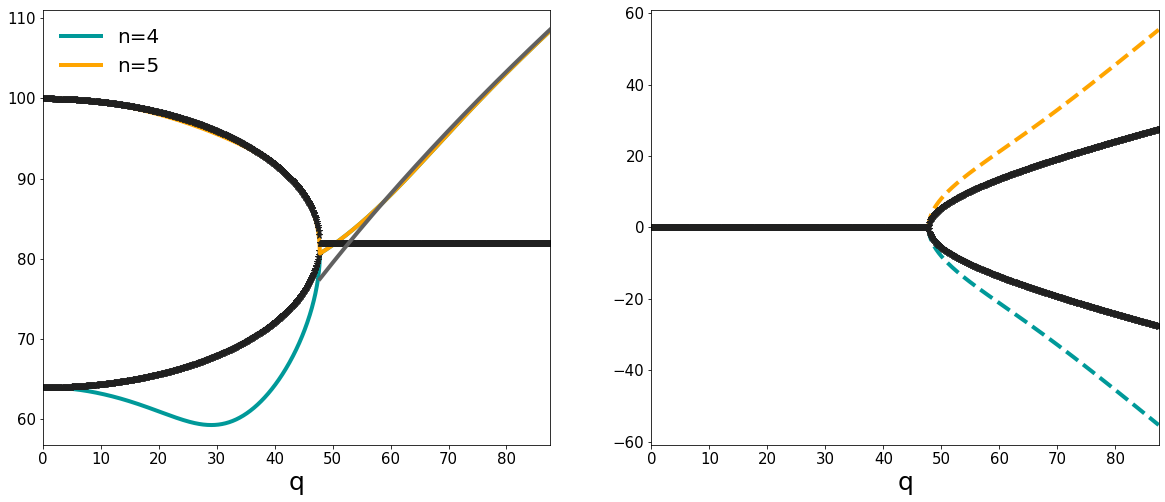

In [14]:
fig, ax = plt.subplots(figsize=(20, 8))
gs = gridspec.GridSpec(1,2)
gs.update(hspace=0.05)
ax1 = plt.subplot(gs[0])
plt.plot(Q.imag, A_vals['a8'].real, color=colors[4], lw=4, label='n=4')
plt.plot(Q.imag, a8c.real, '#202020', lw=2, ls='', marker='*', markersize=7)
plt.plot(Q.imag, A_vals['a10'].real, color=colors[5], lw=4, label='n=5')
plt.plot(Q.imag, a10c.real, '#202020', lw=2, ls='', marker='*', markersize=7)
plt.plot(Q2.imag, a810 , '#606060', lw=4)
plt.xlim(0, qf)
plt.yticks(size=15)
plt.xlabel('q', fontsize=25)
plt.xticks(size=15)
plt.legend(fontsize=20, frameon=False)
ax2 = plt.subplot(gs[1])
plt.plot(Q.imag, A_vals['a8'].imag, color=colors[4], lw=4, ls='--', label='n=4')
plt.plot(Q.imag, a8c.imag, '#202020', lw=2, ls='', marker='*', markersize=7)
plt.plot(Q.imag, A_vals['a10'].imag, color=colors[5], lw=4, ls='--', label='n=5')
plt.plot(Q.imag, a10c.imag, '#202020', lw=2, ls='', marker='*', markersize=7)
plt.xlim(0, qf)
plt.yticks(size=15)
plt.xlabel('q', fontsize=25)
plt.xticks(size=15)
# plt.ylim(-30, 30)
plt.show()